Messwerte: 6


N_0 = 1822.3356463664225 , Standardfehler = 238.05852484593277
Steigung [1/V] = 1.054771942770829 , Standardfehler = 0.4778353567821074
Messwerte: 6


Chi-Quadrat = 4.051043792452089
Freiheitsgrade = 4
Chi-Quadrat reduziert = 1.0127609481130222
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 40.0 %


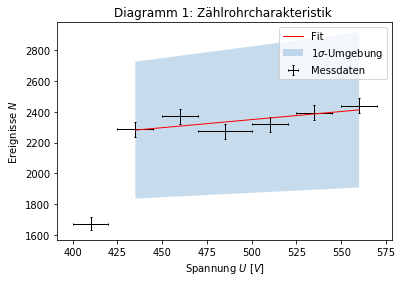

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messwerte aus Tabelle 1: N über U
U = np.array([410, 435, 460, 485, 510, 535, 560])
fehler_U = np.array([10, 10, 10, 15, 10, 10, 10])

N = np.array([1672, 2287, 2370, 2274, 2318, 2394, 2440])
fehler_N = np.sqrt(N)
                    
#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (a, b) = p
    return a+b*x

model = odr.Model(fit_func)

#darzustellende Daten
start = 1
x = U[start:]
y = N[start:]
delta_x = fehler_U[start:]
delta_y = fehler_N[start:]

#Startparameter
para0 = [1.0, 1.0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 1 # um n-Sigma-Umgebung zu zeichnen
popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x), max(x))
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(U, N, yerr=fehler_N, xerr=fehler_U, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.title('Diagramm 1: Zählrohrcharakteristik ')
plt.xlabel('Spannung '+r'${U}$'+' '+r'${[V]}$')
plt.ylabel('Ereignisse '+r'${N}$')
plt.plot(x_fit, fit, 'r', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.legend(loc='best')

#Chi-Quadrat orthogonal
from scipy.stats import chi2

dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Output
plt.savefig('figures/251_Diagramm1.pdf', format='pdf')
print('Messwerte:', x.size)
print('\n')
print('N_0 =', popt[0], ', Standardfehler =', perr[0])                 
print('Steigung [1/V] =', popt[1], ', Standardfehler =', perr[1],)
print('Messwerte:', x.size)
print('\n')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Gaussfit:
A = 2396.3030680284933 , Standardfehler = 44.9408790847629
mu = 68.75437277855337 , Standardfehler = 0.1521434984718217
sig = 8.021843710450405 , Standardfehler = 0.11097461383744504


Poissonfit:
A_p = 2400.53830728721 , Standardfehler = 43.595602079725886
mu_p = 68.80127772486644 , Standardfehler = 0.1489688234564568


Vergleich:
chi2_g = 40.38733776255465 mit 48 Freiheitsgraden
chi2_p = 38.69254359786495 mit 49 Freiheitsgraden
chi2_red_g = 0.8414028700532219
chi2_red_p = 0.789643746895203
Wahrscheinlichkeit Gauss = 77.0 %
Wahrscheinlichkeit Poisson = 85.0 %


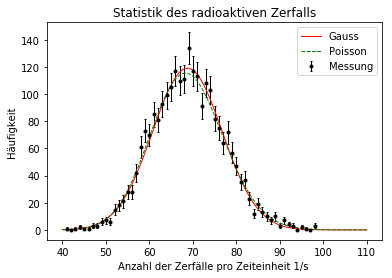

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
anzahl, haeufigkeit = np.loadtxt('data/V251/Messung251_1.dat', unpack=True)
fehler = np.sqrt(haeufigkeit)
start = 2
cut = 5

def gaussian(x, A, mu, sig): #A: Fläche der Gaussfunktion
    return (A/(np.sqrt(2*np.pi)*sig))*np.exp(-(x-mu)**2/2/sig**2)
    
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian,anzahl[start:-cut], haeufigkeit[start:-cut], 
                       p0=[2000,75,8],sigma = fehler[start:-cut])


from scipy.special import gamma

def poisson(x, A_p, mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[start:-cut],
haeufigkeit[start:-cut], p0=[2000, 75], sigma=fehler[start:-cut])

#Plot
plt.errorbar(anzahl,haeufigkeit,fehler, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit 1/s ')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
x=np.linspace(40,110, 100)
plt.plot(x, gaussian(x,*popt), 'r', lw=1, label='Gauss')
plt.plot(x, poisson(x,*popt_p), 'g', lw=1, label='Poisson', linestyle='--')
plt.legend()

#Gauss:
chi2_g=np.sum((gaussian(anzahl[start:-cut],*popt) -haeufigkeit[start:-cut])**2/fehler[start:-cut]**2)
dof_g=len(anzahl[start:-cut])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g

#Poisson:
chi2_p=np.sum((poisson(anzahl[start:-cut],*popt_p) -haeufigkeit[start:-cut])**2/fehler[start:-cut]**2)
dof_p=len(anzahl[start:-cut])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p

from scipy.stats import chi2

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100

#Output
plt.savefig('figures/251_Diagramm2.pdf', format='pdf')

print('Gaussfit:')
print('A =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('mu =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('sig =',popt[2], ', Standardfehler =', np.sqrt(pcov[2][2]))
print('\n')
print('Poissonfit:')
print('A_p =',popt_p[0], ', Standardfehler =', np.sqrt(pcov_p[0][0]))
print('mu_p =',popt_p[1], ', Standardfehler =', np.sqrt(pcov_p[1][1]))
print('\n')
print('Vergleich:')
print('chi2_g =', chi2_g, 'mit', dof_g, 'Freiheitsgraden')
print('chi2_p =', chi2_p, 'mit', dof_p, 'Freiheitsgraden')
print('chi2_red_g =',chi2_red_g)
print('chi2_red_p =',chi2_red_p)
print('Wahrscheinlichkeit Gauss =', prob_g,'%')
print('Wahrscheinlichkeit Poisson =', prob_p,'%')

Gaussfit:
A = 5359.257280691364 , Standardfehler = 257.97397848662354
mu = 4.423854861857604 , Standardfehler = 0.10685268956301469
sig = 2.146780815931032 , Standardfehler = 0.08407417175300809


Poissonfit:
A_p = 5410.98016816413 , Standardfehler = 97.10171565059488
mu_p = 4.473591314649232 , Standardfehler = 0.03874445263495685


Vergleich:
chi2_g = 122.44154265337966 mit 10 Freiheitsgraden
chi2_p = 19.152874158418197 mit 11 Freiheitsgraden
chi2_red_g = 12.244154265337965
chi2_red_p = 1.7411703780380179
Wahrscheinlichkeit Gauss = 0.0 %
Wahrscheinlichkeit Poisson = 6.0 %


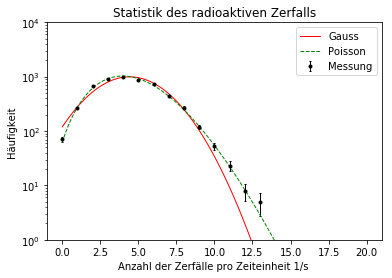

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
anzahl, haeufigkeit = np.loadtxt('data/V251/Messung251_2.dat', unpack=True)
fehler = np.sqrt(haeufigkeit)
start = 0
cut = 1

def gaussian(x, A, mu, sig): #A: Fläche der Gaussfunktion
    return (A/(np.sqrt(2*np.pi)*sig))*np.exp(-(x-mu)**2/2/sig**2)
    
from scipy.optimize import curve_fit

popt, pcov = curve_fit(gaussian,anzahl[start:-cut], haeufigkeit[start:-cut], 
                       p0=[100,4,2],sigma = fehler[start:-cut])


from scipy.special import gamma

def poisson(x, A_p, mu_p):
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

popt_p, pcov_p = curve_fit(poisson, anzahl[start:-cut],
haeufigkeit[start:-cut], p0=[100, 4], sigma=fehler[start:-cut])

#Plot
plt.errorbar(anzahl,haeufigkeit,fehler, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.yscale('log')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit 1/s ')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
plt.ylim((1,1e4))
x=np.linspace(0,20, 100)
plt.plot(x, gaussian(x,*popt), 'r', lw=1, label='Gauss')
plt.plot(x, poisson(x,*popt_p), 'g', lw=1, label='Poisson', linestyle='--')
plt.legend()

#Gauss:
chi2_g=np.sum((gaussian(anzahl[start:-cut],*popt) -haeufigkeit[start:-cut])**2/fehler[start:-cut]**2)
dof_g=len(anzahl[start:-cut])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g

#Poisson:
chi2_p=np.sum((poisson(anzahl[start:-cut],*popt_p) -haeufigkeit[start:-cut])**2/fehler[start:-cut]**2)
dof_p=len(anzahl[start:-cut])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p

from scipy.stats import chi2

#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100

#Output
plt.savefig('figures/251_Diagramm3.pdf', format='pdf')

print('Gaussfit:')
print('A =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('mu =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('sig =',popt[2], ', Standardfehler =', np.sqrt(pcov[2][2]))
print('\n')
print('Poissonfit:')
print('A_p =',popt_p[0], ', Standardfehler =', np.sqrt(pcov_p[0][0]))
print('mu_p =',popt_p[1], ', Standardfehler =', np.sqrt(pcov_p[1][1]))
print('\n')
print('Vergleich:')
print('chi2_g =', chi2_g, 'mit', dof_g, 'Freiheitsgraden')
print('chi2_p =', chi2_p, 'mit', dof_p, 'Freiheitsgraden')
print('chi2_red_g =',chi2_red_g)
print('chi2_red_p =',chi2_red_p)
print('Wahrscheinlichkeit Gauss =', prob_g,'%')
print('Wahrscheinlichkeit Poisson =', prob_p,'%')